<a href="https://colab.research.google.com/github/harshs-data/Exploratory-Data-Analysis/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [3]:
df = pd.DataFrame(salary, columns = ['Salary'])

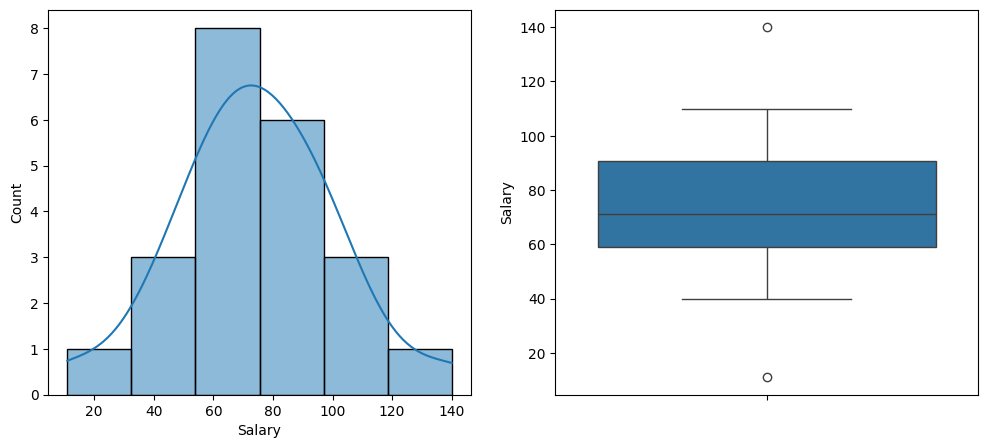

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'], kde = True)
plt.subplot(1,2,2)
sns.boxplot(df['Salary'])
plt.show()

In [8]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [5]:
# dropping the outlier
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR



In [6]:
lower_fence

np.float64(11.375)

In [7]:
upper_fence

np.float64(138.375)

In [9]:
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [10]:
df_filtered.shape

(20, 1)

In [11]:
df.shape

(22, 1)

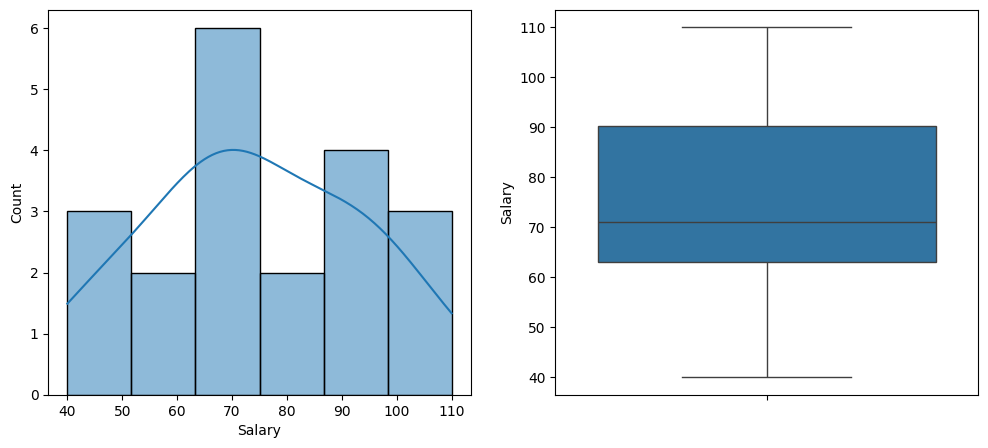

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['Salary'], kde = True)
plt.subplot(1,2,2)
sns.boxplot(df_filtered['Salary'])
plt.show()

In [13]:
# Capping >> replace with the nearest value which is not outlier
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [14]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [29]:
lower_cap = df['Salary'].quantile(0.05)
upper_cap = df['Salary'].quantile(0.95)

In [30]:
lower_cap

np.float64(40.25)

In [18]:
upper_cap

np.float64(109.55)

In [33]:
df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap,
         np.where(df['Salary'] > upper_cap, upper_cap, df['Salary']))

In [34]:
df

,Salary,Salary_capped
0,11,40.25
1,40,40.25
2,45,45.00
3,68,68.00
4,65,65.00
5,68,68.00
6,78,78.00
7,90,90.00
8,57,57.00
9,74,74.00
